In [1]:
file_path =  r"C:\Users\arunk\Downloads\SBIN"

In [2]:
# importing libraries
import pandas as pd
import numpy as np

# reading the data
df = pd.read_csv(file_path)

# looking at the first five rows of the data
print(df.head())
print('\n Shape of the data:')
print(df.shape)

# setting the index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

# NOTE: While splitting the data into train and validation set, we cannot use random splitting since that will destroy the time component. So here we have set the last year’s data into validation and the 4 years’ data before that into train set.

# splitting into train and validation
train = new_data[:987]
valid = new_data[987:]

# shapes of training set
print('\n Shape of training set:')
print(train.shape)

# shapes of validation set
print('\n Shape of validation set:')
print(valid.shape)

# In the next step, we will create predictions for the validation set and check the RMSE using the actual values.
# making predictions
preds = []
for i in range(0,valid.shape[0]):
    a = train['Close'][len(train)-248+i:].sum() + sum(preds)
    b = a/248
    preds.append(b)

# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)

         Date Symbol Series  Prev Close   Open    High    Low    Last   Close  \
0  2017-01-02   SBIN     EQ      250.20  252.5  253.65  242.6  243.55  243.60   
1  2017-01-03   SBIN     EQ      243.60  244.0  246.40  241.1  244.90  244.90   
2  2017-01-04   SBIN     EQ      244.90  245.8  246.40  242.2  243.20  242.90   
3  2017-01-05   SBIN     EQ      242.90  245.0  245.90  243.7  245.50  245.35   
4  2017-01-06   SBIN     EQ      245.35  246.0  249.00  245.5  246.05  245.90   

     VWAP    Volume      Turnover  Trades  Deliverable Volume  %Deliverble  
0  244.80  25988990  6.362168e+14  164268            12078409       0.4648  
1  244.54  15963085  3.903556e+14  112537             4370526       0.2738  
2  243.96  11225978  2.738651e+14   91672             3632352       0.3236  
3  244.94  11970913  2.932209e+14   88254             4511456       0.3769  
4  247.10  12354302  3.052714e+14   75839             3393716       0.2747  

 Shape of the data:
(1370, 15)

 Shape of training

In [23]:
new_data
new_data['Date'] = pd.to_datetime(new_data.Date,format='%Y-%m-%d')
new_data['year'] = new_data['Date'].dt.year
new_data['month'] = new_data['Date'].dt.month
new_data['day'] = new_data['Date'].dt.day


In [25]:
new_data.head()

,Date,Close,year,month,day
0,2017-01-02,243.6,2017,1,2
1,2017-01-03,244.9,2017,1,3
2,2017-01-04,242.9,2017,1,4
3,2017-01-05,245.35,2017,1,5
4,2017-01-06,245.9,2017,1,6


In [28]:
new_data['numeric_date'] = pd.to_numeric(new_data['Date'])

In [40]:
new_data['Date'].dt.dayofweek
new_data['Date'].dt.weekday[2]
# new_data['Date'].dt.day_name()


2

In [67]:
new_data['mon_fri'] = 0
for i in range(0,len(new_data)):
    if (new_data['Date'].dt.weekday[i]==0 or new_data['Date'].dt.weekday[i]==4):
        new_data['mon_fri'] = 1

    else:
        new_data['mon_fri'] = 0
new_data.drop(['Date'], axis =1, inplace=True)

In [68]:
new_data.dtypes
new_data['Close'] = pd.to_numeric(new_data['Close'])

In [78]:
# split train  and validation

train = new_data[:987]
valid = new_data[987:]

X_train =train.drop('Close',axis=1)
y_train = train['Close']
X_valid = valid.drop('Close',axis=1)
y_valid = valid['Close']
y_valid.isnull().sum()


0

In [79]:
# implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [84]:
# make prediction and find the rmse
preds  = model.predict(X_valid)
preds

array([244.11597644, 244.08578773, 244.05559903, 244.02541032,
       243.69216289, 243.60159676, 243.57140806, 243.54121935,
       243.51103064, 243.48084193, 243.39027581, 243.3600871 ,
       243.32989839, 243.29970969, 243.26952098, 243.17895485,
       243.14876615, 243.11857744, 243.08838873, 243.05820002,
       242.9676339 , 242.90725648, 242.87706778, 242.84687907,
       242.4531409 , 242.42295219, 242.39276348, 242.36257477,
       242.33238607, 242.24181994, 242.21163124, 242.18144253,
       242.15125382, 242.12106511, 242.03049899, 242.00031028,
       241.97012157, 241.93993287, 241.90974416, 241.81917803,
       241.78898933, 241.75880062, 241.72861191, 241.6984232 ,
       241.33402314, 241.30383443, 241.27364573, 241.24345702,
       241.21326831, 241.12270219, 241.09251348, 241.06232477,
       241.00194736, 240.91138123, 240.88119253, 240.85100382,
       240.82081511, 240.7906264 , 240.70006028, 240.66987157,
       240.63968286, 240.60949416, 240.57930545, 240.45

In [81]:
rms = np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

216.64870412043416

The RMSE value is higher than the Moving Average technique, which clearly shows that linear regression has perforned poorly.


In [85]:
valid

,Close,year,month,day,numeric_date,mon_fri,Predictions
987,275.20,2020,12,28,1609113600000000000,0,244.115976
988,277.90,2020,12,29,1609200000000000000,0,244.085788
989,276.90,2020,12,30,1609286400000000000,0,244.055599
990,274.95,2020,12,31,1609372800000000000,0,244.025410
991,279.40,2021,1,1,1609459200000000000,0,243.692163
...,...,...,...,...,...,...,...
1365,479.95,2022,7,6,1657065600000000000,0,221.718554
1366,486.75,2022,7,7,1657152000000000000,0,221.688365
1367,488.55,2022,7,8,1657238400000000000,0,221.658176
1368,488.20,2022,7,11,1657497600000000000,0,221.567610


C:\Users\arunk\AppData\Local\Temp\ipykernel_1396\3407070223.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = preds


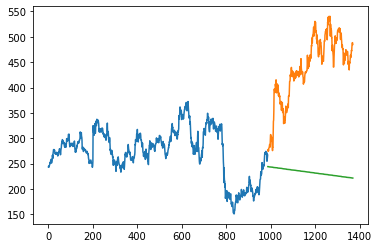

In [86]:
import matplotlib.pyplot as plt
# PLOT
valid['Predictions'] = preds
valid.index = new_data[987:].index
train.index = new_data[:987].index

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])



In [118]:
# KNN
from sklearn import  neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler  = MinMaxScaler(feature_range=(0,1))

# scaling data
scaled_new_data = scaler.fit_transform(new_data)
scaled_new_data_df = pd.DataFrame(scaled_new_data)

# train = scaled_new_data_df[987:]
# valid = scaled_new_data_df[:987]

train = new_data[:987]
valid = new_data[987:]

# X_train =train.drop(1,axis=1)
# y_train = train[1]
# X_valid = valid.drop(1,axis=1)
# y_valid = valid[1]
# y_valid.isnull().sum()

X_train =train.drop('Close',axis=1)
y_train = train['Close']
X_valid = valid.drop('Close',axis=1)
y_valid = valid['Close']
y_valid.isnull().sum()


# find best parameter
params= {'n_neighbors':[2,3,4,5,6]}
knn  = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn,params,cv=5)

# fit model and make predictions
model.fit(X_train,y_train)
preds = model.predict(X_valid)

In [119]:
#RMSE
rms = np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

188.69240130621307

C:\Users\arunk\AppData\Local\Temp\ipykernel_1396\202172678.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = preds


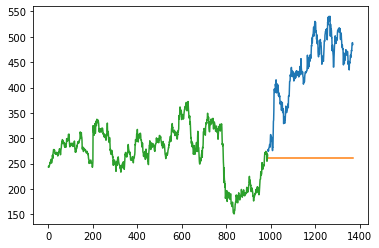

In [120]:
import matplotlib.pyplot as plt
# PLOT
valid['Predictions'] = preds


plt.plot(valid[['Close', 'Predictions']])

plt.plot(train['Close'])

In [121]:
X_train.shape

(987, 5)

In [122]:
y_train.shape

(987,)

In [123]:
y_valid.shape

(383,)

In [124]:
X_valid.shape

(383, 5)

In [160]:
from sklearn.ensemble import RandomForestRegressor
# param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}
rfr = RandomForestRegressor(random_state = 1)

# fit model and make predictions
model.fit(X_train,y_train)
preds = model.predict(X_valid)
# model = GridSearchCV(rfr,params,cv=5,n_jobs=1)

TypeError: Parameter grid for parameter 'max_depth' needs to be a list or a numpy array, but got 5 (of type int) instead. Single values need to be wrapped in a list with one element.

In [130]:
model.predict(X_valid)

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.